In [1280]:
# Para lectura de archivos csv
import pandas as pd
# Para generar diagramas
import seaborn as sns
import plotly.express as px

# Para regresion
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV


## **ANALISIS DE LOS DATOS DE ENTRENAMIENTO**

Definimos la variable en donde vamos a leer los datos

In [1281]:
train = pd.read_csv('train.csv', encoding='latin1')

Primero vamos a analizar los datos que tenemos

In [1282]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1283]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1284]:
train.shape

(1460, 81)

# Buscamos valores nulos

In [1285]:
train.isnull().sum().sort_values(ascending=False)/len(train)*100

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

<AxesSubplot: >

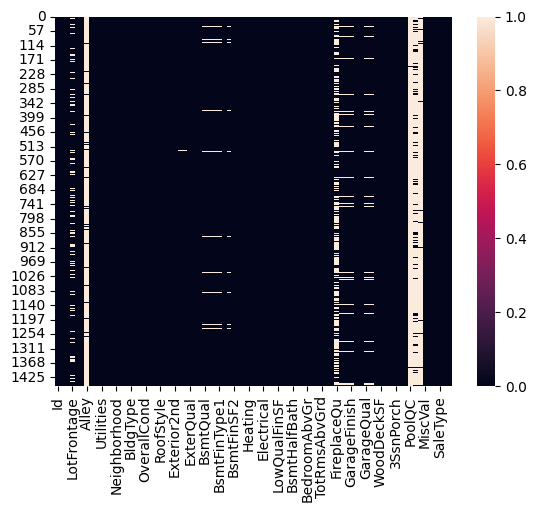

In [1286]:
sns.heatmap(train.isna())

Procedemos a eliminar los datos con más valores nulos

In [1287]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

<AxesSubplot: >

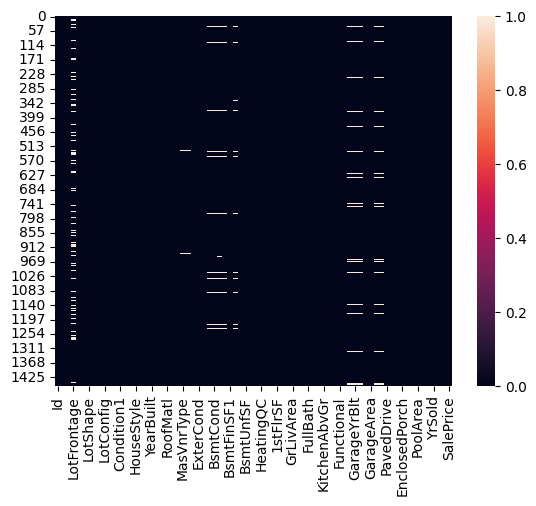

In [1288]:
sns.heatmap(train.isna())

In [1289]:
train.shape

(1460, 76)

# Veamos los tipos de datos que tenemos

Text(0.5, 1.0, 'Count of Dtypes')

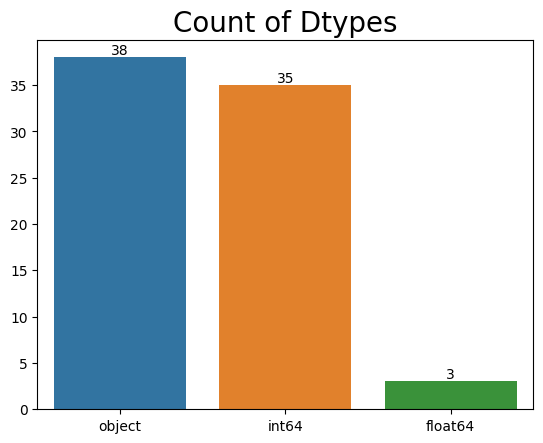

In [1290]:
ax = sns.barplot(x = train.dtypes.value_counts().index, y = train.dtypes.value_counts()[[0,1,2]])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Dtypes", fontsize = 20)

# Veamos la correlación de los datos

C:\Users\danop\AppData\Local\Temp\ipykernel_25848\3446434900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<AxesSubplot: >

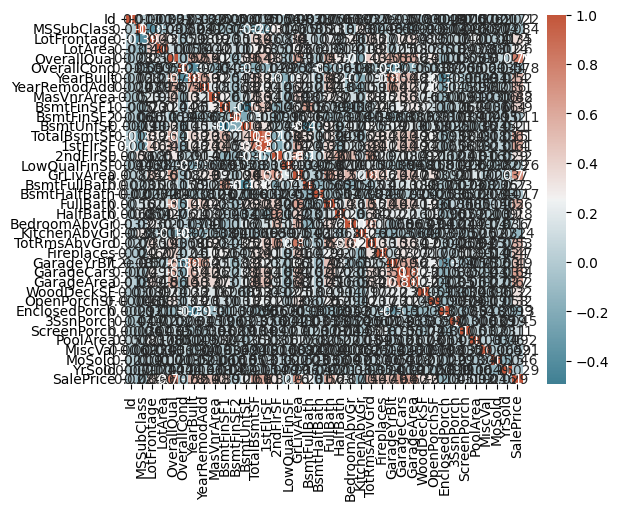

In [1291]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Como la tabla anterior no nos ayuda mucho, vamos a mostrarlo en una tabla

In [1292]:
cor = pd.DataFrame(train.corr()["SalePrice"].sort_values(ascending = False))
cor.columns = ["Correlation"]
cor[0:20]

C:\Users\danop\AppData\Local\Temp\ipykernel_25848\3705146467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = pd.DataFrame(train.corr()["SalePrice"].sort_values(ascending = False))


,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Vamos a centrarnos unicamente en datos que sean relevantes, es decir, que tengan más correlación en este caso mayor a 0.5

C:\Users\danop\AppData\Local\Temp\ipykernel_25848\1329981894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<AxesSubplot: >

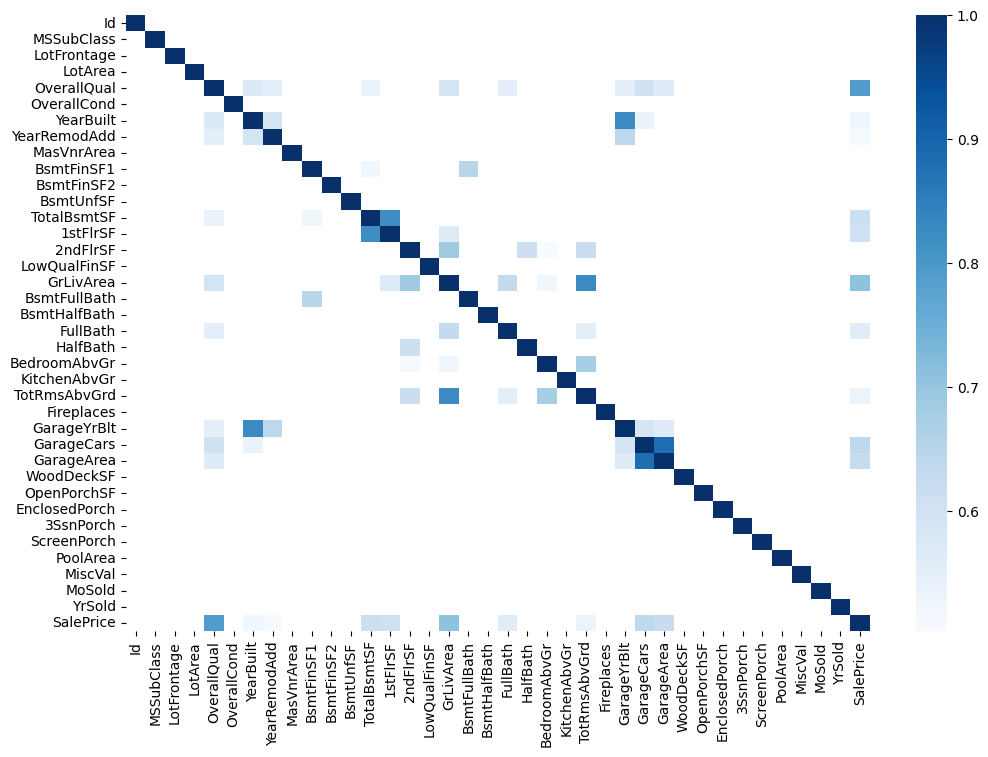

In [1293]:
corr = train.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

Para continuar, vamos a eliminar los datos que no seal utiles, es decir, que tengan poca correlación

In [1294]:
baja_cor=(cor.Correlation<.4)[14:].index
train.drop(baja_cor,axis=1,inplace=True)

In [1295]:
train.shape

(1460, 52)

# Ahora vamos a ver los datos que no sean objetos

Veamos los que tengan valores nulos

In [1296]:
train.select_dtypes(exclude=object).isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

A los valores nulos les vamos a asignar un 0

In [1297]:
train.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea.mode()[0])
train.GarageYrBlt = train.GarageYrBlt.fillna(train.GarageYrBlt.mode()[0])

In [1298]:
train.select_dtypes(exclude=object).isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [1299]:
train.select_dtypes(exclude=object).head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000


# Ahora veamos los valores unicos

In [1300]:
train.select_dtypes(include=object).nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
Foundation        6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
BldgType          5
GarageCond        5
GarageQual        5
Electrical        5
LotConfig         5
HeatingQC         5
ExterCond         5
MSZoning          5
BsmtExposure      4
BsmtCond          4
BsmtQual          4
MasVnrType        4
KitchenQual       4
LandContour       4
ExterQual         4
LotShape          4
LandSlope         3
GarageFinish      3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64

Borraremos los que tengan más valores unicos

In [1301]:
drop_uniques=['Neighborhood','Exterior2nd','Exterior1st','SaleType','Condition1','Condition2','HouseStyle','RoofMatl','Functional']
train.drop(drop_uniques,axis=1,inplace=True)

In [1302]:
train.shape

(1460, 43)

Ahora de los valores unicos veamos cuales tienen datos vacios

In [1303]:
train.select_dtypes(include=object).isnull().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrType        8
Electrical        1
PavedDrive        0
KitchenQual       0
CentralAir        0
HeatingQC         0
Heating           0
MSZoning          0
Street            0
Foundation        0
ExterCond         0
ExterQual         0
RoofStyle         0
BldgType          0
LandSlope         0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
SaleCondition     0
dtype: int64

In [1304]:
drop_uniques=['GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1','BsmtQual','MasVnrType','Electrical']
train.drop(drop_uniques,axis=1,inplace=True)

In [1305]:
train.shape

(1460, 32)

Comprovemos que no tenemos valores nulos ya

In [1306]:
train.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
BldgType         0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive       0
SaleCondition    0
SalePrice        0
dtype: int64

Ahora, dado que para hacer regresion necesitamos valores que no sean strings, vamos a pasar los datos unicos por un Encode de SKlearn

In [1307]:
from sklearn.preprocessing import OrdinalEncoder
od = OrdinalEncoder()
cat_col=train.select_dtypes(include=object).columns
cat_col
train[cat_col] = od.fit_transform(train[cat_col])

De esta forma, como vemos, no tenemos datos con valores unicos o strings

In [1308]:
train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,OverallQual,YearBuilt,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,SaleCondition,SalePrice
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,7,2003,...,2,2.0,8,0,2003.0,2,548,2.0,4.0,208500
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,0.0,6,1976,...,2,3.0,6,1,1976.0,2,460,2.0,4.0,181500
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,7,2001,...,2,2.0,6,1,2001.0,2,608,2.0,4.0,223500
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7,1915,...,1,2.0,7,1,1998.0,3,642,2.0,0.0,140000
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,8,2000,...,2,2.0,9,1,2000.0,3,836,2.0,4.0,250000


## ANALISIS DE LOS DATOS DE PRUEBA

In [1309]:
test = pd.read_csv('test.csv', encoding='latin1')
test_df = pd.read_csv('test.csv', encoding='latin1')

In [1310]:
test.shape

(1459, 80)

In [1311]:
train.shape

(1460, 32)

Tenemos que dejar el mismo numero de columnas en test que en train

In [1312]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1313]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Vamos a borrar lo mismo que borramos en train, para test

In [1314]:
baja_cor=(cor.Correlation<.4)[14:].index
test.drop(baja_cor,axis=1,inplace=True)

In [1315]:
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [1316]:
drop_uniques=['GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtExposure','BsmtCond','BsmtFinType1','BsmtQual','MasVnrType','Electrical']
test.drop(drop_uniques,axis=1,inplace=True)

In [1317]:
drop_uniques=['Neighborhood','Exterior2nd','Exterior1st','SaleType','Condition1','Condition2','HouseStyle','RoofMatl','Functional']
test.drop(drop_uniques,axis=1,inplace=True)

Y a los valores nulos les asignamos un 0

In [1318]:
test.MasVnrArea = test.MasVnrArea.fillna(test.MasVnrArea.mode()[0])
test.GarageYrBlt = test.GarageYrBlt.fillna(test.GarageYrBlt.mode()[0])

In [1319]:
test.isnull().sum().sort_values(ascending=False)

MSZoning         4
Utilities        2
TotalBsmtSF      1
GarageArea       1
GarageCars       1
KitchenQual      1
PavedDrive       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
FullBath         0
GrLivArea        0
1stFlrSF         0
CentralAir       0
HeatingQC        0
Heating          0
Foundation       0
Street           0
ExterCond        0
ExterQual        0
MasVnrArea       0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallQual      0
BldgType         0
LandSlope        0
LotConfig        0
LandContour      0
LotShape         0
SaleCondition    0
dtype: int64

Ahora, estos valores que estan nulos vamos a asignarles un valor

In [1320]:
null_cat_test=['MSZoning','Utilities','TotalBsmtSF','GarageArea','GarageCars','KitchenQual']
simp_test = SimpleImputer(strategy = 'most_frequent')
test[null_cat_test] = simp_test.fit_transform(test[null_cat_test])

In [1321]:
train.shape

(1460, 32)

In [1322]:
test.shape

(1459, 31)

Veamos que no tengamos valores nulos

In [1323]:
test.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
BldgType         0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive       0
SaleCondition    0
dtype: int64

Ahora que estan iguales, vamos a usar Encode para no tener strings

In [1324]:
from sklearn.preprocessing import OrdinalEncoder
od = OrdinalEncoder()
cat_col=test.select_dtypes(include=object).columns
cat_col
test[cat_col] = od.fit_transform(test[cat_col])

In [1325]:
test.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,OverallQual,YearBuilt,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,SaleCondition
0,2.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,5,1961,...,896,1,3.0,5,0,1961.0,1.0,348.0,2.0,4.0
1,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6,1958,...,1329,1,2.0,6,0,1958.0,1.0,67.0,2.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,5,1997,...,1629,2,3.0,6,1,1997.0,2.0,179.0,2.0,4.0
3,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,6,1998,...,1604,2,2.0,7,1,1998.0,2.0,168.0,2.0,4.0
4,3.0,1.0,0.0,1.0,0.0,4.0,0.0,4.0,8,1992,...,1280,2,2.0,5,0,1992.0,2.0,198.0,2.0,4.0


## Regresion Lineal

En este caso para hacer la regresión al modelo de entrenamiento le borraremos el costo esperado

In [1326]:
Y=train['SalePrice']
train.drop(['SalePrice'],axis=1,inplace=True)

In [1327]:
X_train, X_test, y_train, y_test = train_test_split(train, Y)

Vemos que se hayan dividido los conjuntos

In [1328]:
print(len(X_train),len(X_test))

1095 365


In [1329]:
print(len(y_train),len(y_test))

1095 365


Creamos el modelo

In [1330]:
regression_model = LinearRegression()
regression_model = regression_model.fit(X_train,y_train)

Estima los valores de prueba

In [1331]:
Y_predict=regression_model.predict(test)
Y_predict

array([ 99199.69465815, 158684.01308848, 160507.45073927, ...,
       132989.62510207, 100579.36657537, 229269.99099606])

Creamos lo que vamos a enviar

In [1332]:
test.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,OverallQual,YearBuilt,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,SaleCondition
0,2.0,1.0,3.0,3.0,0.0,4.0,0.0,0.0,5,1961,...,896,1,3.0,5,0,1961.0,1.0,348.0,2.0,4.0
1,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6,1958,...,1329,1,2.0,6,0,1958.0,1.0,67.0,2.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,5,1997,...,1629,2,3.0,6,1,1997.0,2.0,179.0,2.0,4.0
3,3.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,6,1998,...,1604,2,2.0,7,1,1998.0,2.0,168.0,2.0,4.0
4,3.0,1.0,0.0,1.0,0.0,4.0,0.0,4.0,8,1992,...,1280,2,2.0,5,0,1992.0,2.0,198.0,2.0,4.0


In [1333]:
submission=pd.DataFrame({"Id":test_df['Id'] ,"SalePrice":Y_predict})
submission

,Id,SalePrice
0,1461,99199.694658
1,1462,158684.013088
2,1463,160507.450739
3,1464,188383.874034
4,1465,182460.842022
...,...,...
1454,2915,59405.849856
1455,2916,55541.714296
1456,2917,132989.625102
1457,2918,100579.366575


Finalmente vamos a guardar los resultados obtenidos

In [1334]:
submission.to_csv('submission.csv', index=False)